In [35]:
# Nesse modelo analiso a base de dados do Kaggle "Customer Personality Analysis" (https://www.kaggle.com/imakash3011/customer-personality-analysis). 
# Essa analise tem como objetivo determinar a personalidade dos clientes com o objetivo de direcionar mais acertivamente um produto para determinado perfil
# ou ainda na criação de um produto direcionar para o publico com a maior probabilidade de compra, aumentando assim os lucros.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# # to install umap
# # conda install -c conda-forge umap-learn
import umap.umap_ as umap
sns.set()



In [54]:
# DATA BASE READ
df = pd.read_csv("../dataset/marketing_campaign.csv", sep="\t")

In [55]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [57]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


# Data Clear

In [58]:
# WE CAN SEE THAT "Income" HAVE SOME "na" ITENS
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [59]:
# DROP ALL "na's"
df = df.dropna()
df = df.reset_index(drop=True)

In [60]:
# CAST Dt_Custumes TO DATETIME
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"])

In [61]:
# DROP Z_CostContact, Z_Revenue and ID, I THINK THAT THESE COLUMNS ARE IRRELEVANT
df = df.drop(["Z_CostContact", "Z_Revenue"], axis=1)
df = df.drop(["ID"], axis=1)

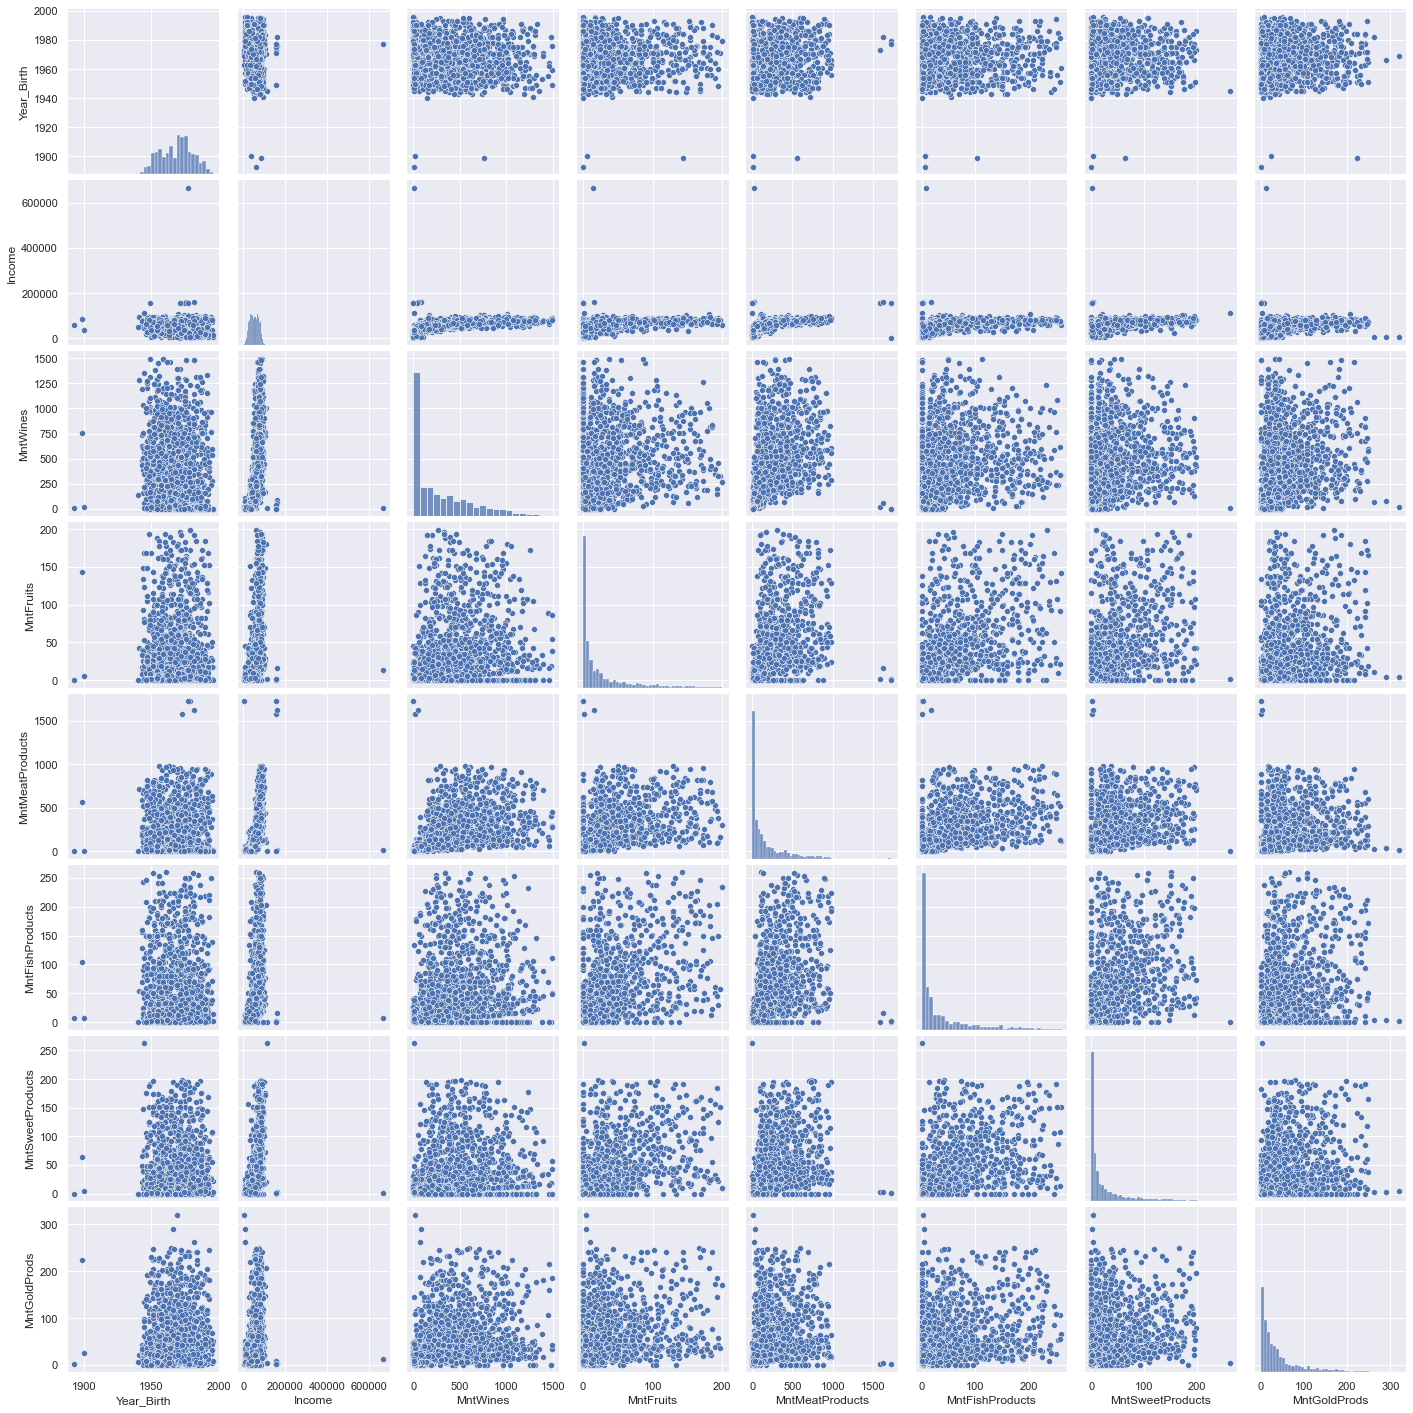

In [62]:
# HERE WE CAN SEE SOME OUTLIERS IN "Year_Bith" and "Income"
sns.pairplot(df[["Year_Birth", "Income", "MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]])

<AxesSubplot:ylabel='Year_Birth'>

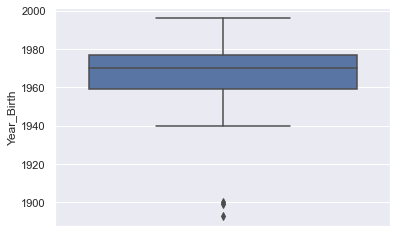

In [78]:
sns.boxplot(y=df["Year_Birth"])

<AxesSubplot:ylabel='Income'>

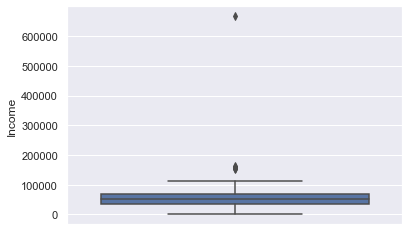

In [77]:
sns.boxplot(y=df["Income"])

<AxesSubplot:ylabel='MntMeatProducts'>

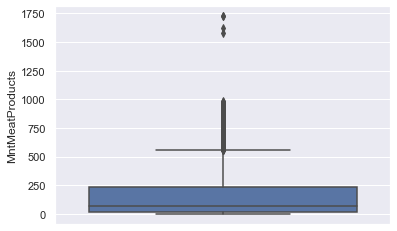

In [79]:
sns.boxplot(y=df["MntMeatProducts"])

In [88]:
# WE WILL MAKE A METHOD TO REMOVE THE OUTLIERS
def remove_outliers(data, column):
    q1, q3 = data[column].quantile([0.25, 0.75])
    
    iqr = q3 - q1
    r1 = max(q1 - 1.5 * iqr, 0)
    r2 = q3 + 1.5 * iqr
    
    print(r1)
    print(r2)
    
    print(data.loc[~data[column].between(r1,r2), column].index)
    
    data = data.drop(data.loc[~data[column].between(r1,r2), column].index) 
    data = data.reset_index(drop=True)
    
    return data

# df = remove_outliers(df, "Year_Birth")
df = remove_outliers(df, "Income")
df = remove_outliers(df, "MntMeatProducts")

0
118348.5
Int64Index([153, 601, 639, 671, 1284, 1633, 2106, 2206], dtype='int64')
0
556.0
Int64Index([  20,   27,   47,   70,   71,   82,   95,  107,  117,  124,
            ...
            2099, 2118, 2130, 2134, 2143, 2154, 2157, 2160, 2178, 2180],
           dtype='int64', length=170)


<AxesSubplot:ylabel='Year_Birth'>

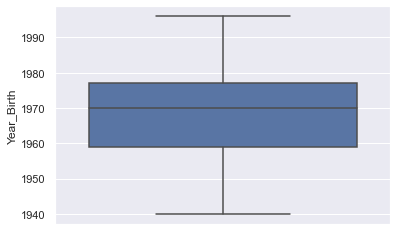

In [87]:
sns.boxplot(y=df["Year_Birth"])

<AxesSubplot:ylabel='Income'>

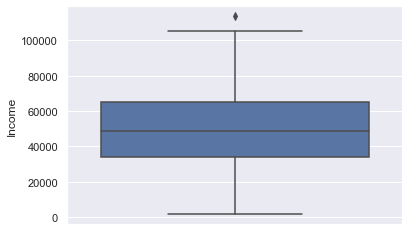

In [89]:
sns.boxplot(y=df["Income"])

<AxesSubplot:ylabel='MntMeatProducts'>

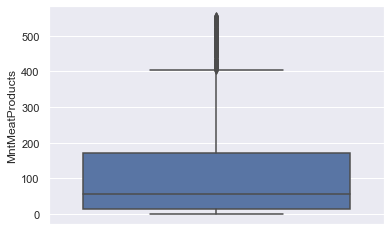

In [90]:
sns.boxplot(y=df["MntMeatProducts"])

# Plots
 Make some plots to see how the data behave

In [91]:
categorical = ["Marital_Status", "Education", "Kidhome", "Teenhome", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "AcceptedCmp1", "AcceptedCmp2", "Response", "Complain"]

numerical = []

for col in df.columns:
    if col not in categorical:
        numerical.append(col)

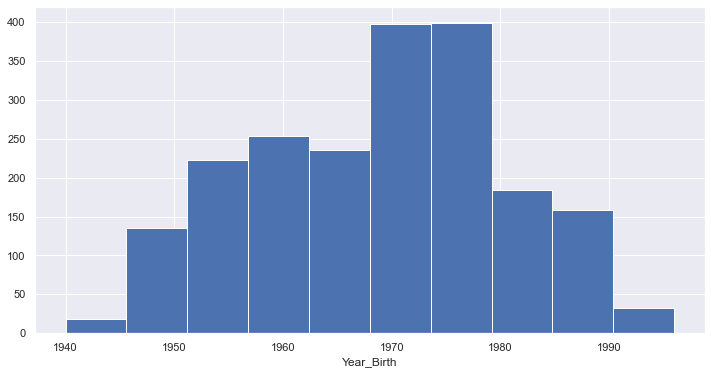

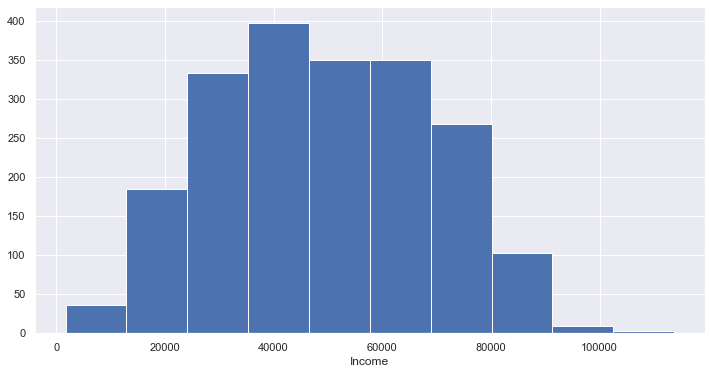

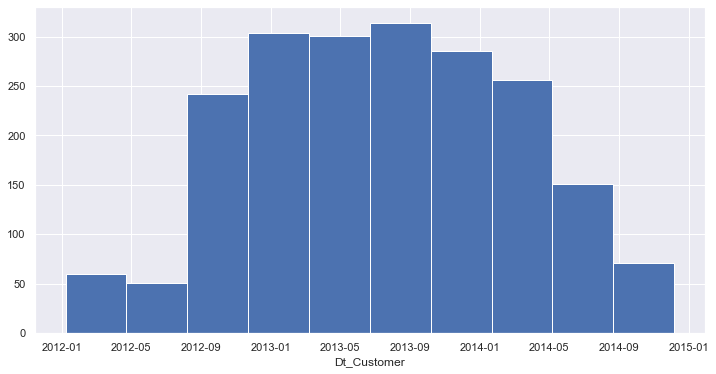

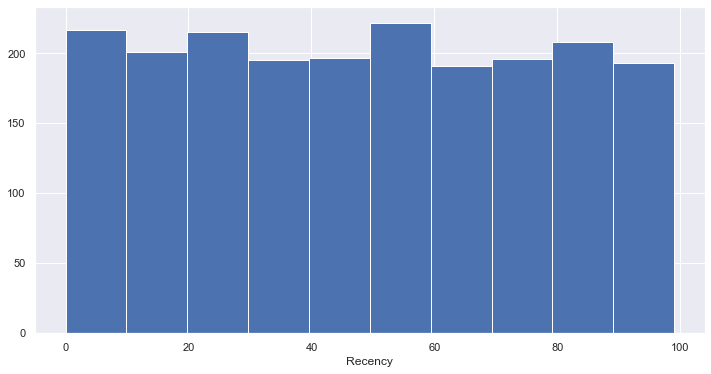

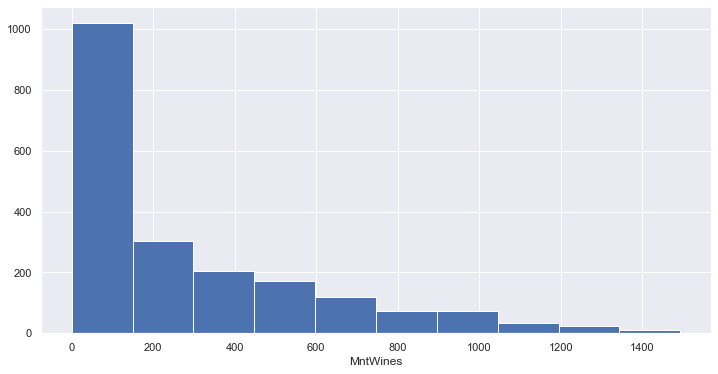

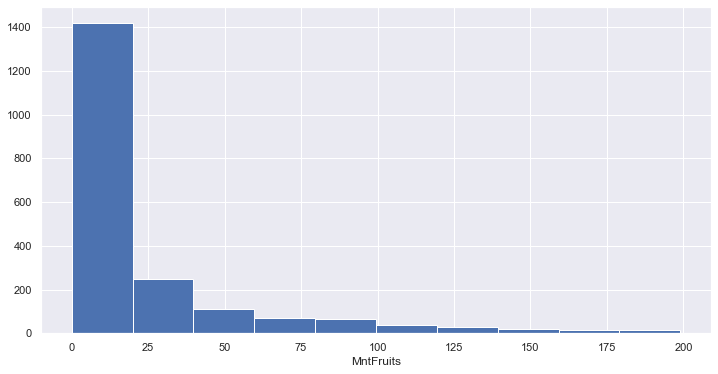

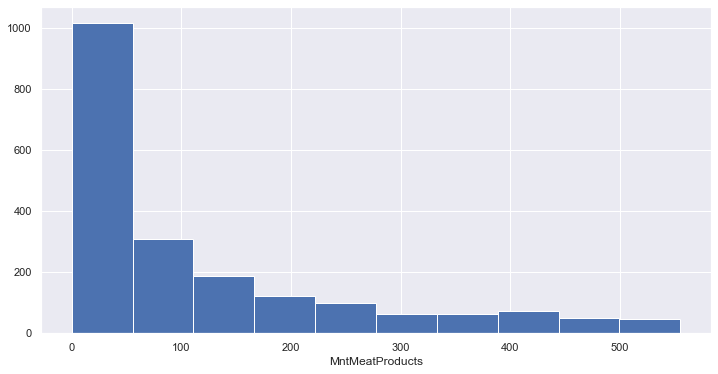

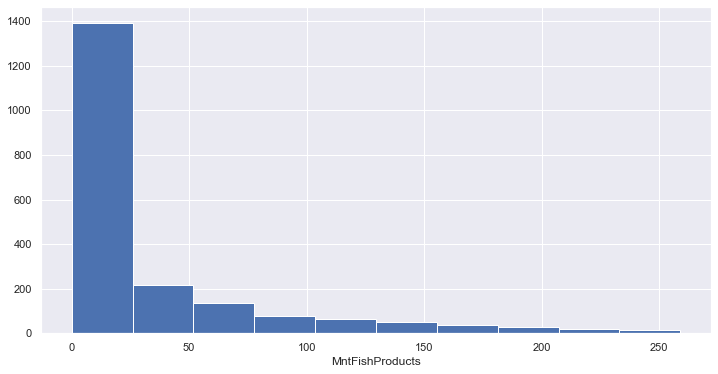

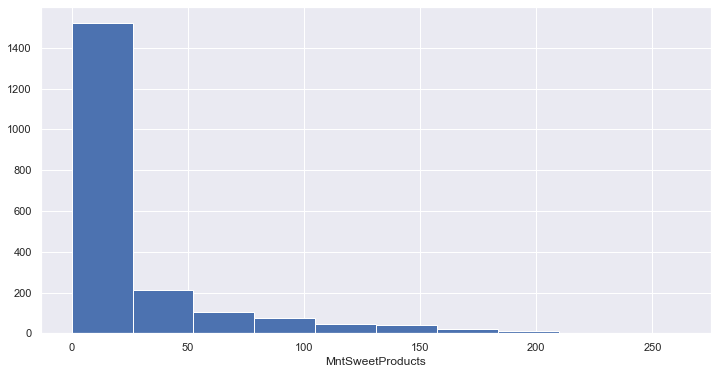

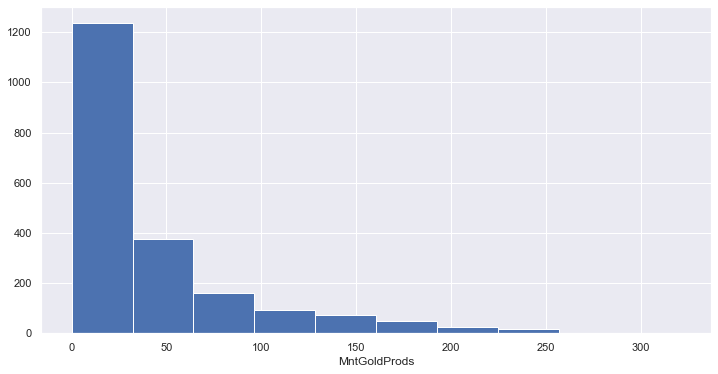

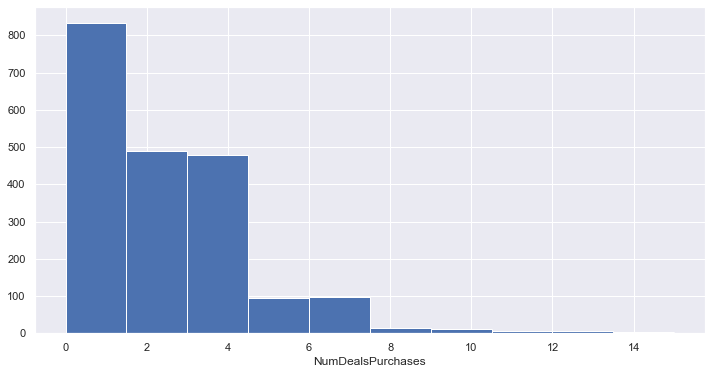

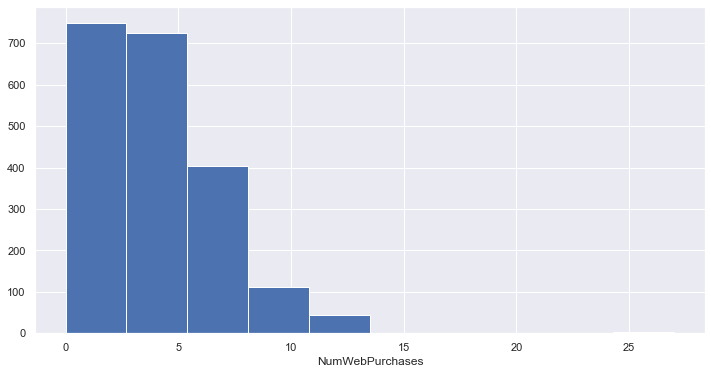

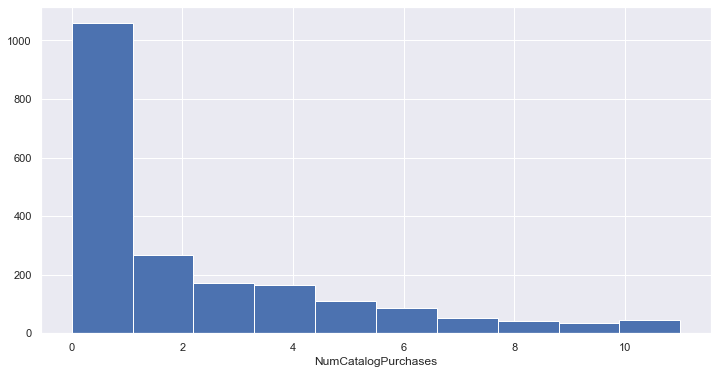

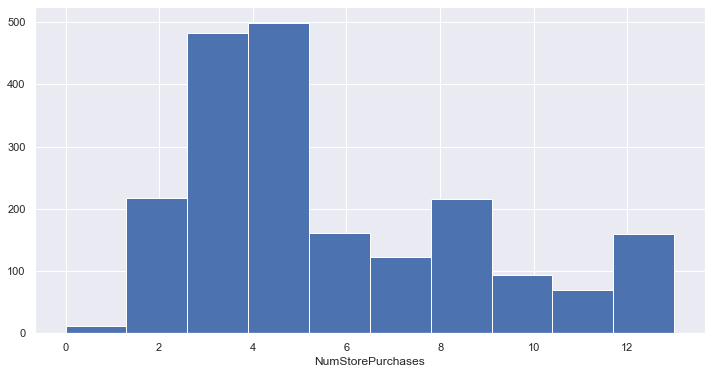

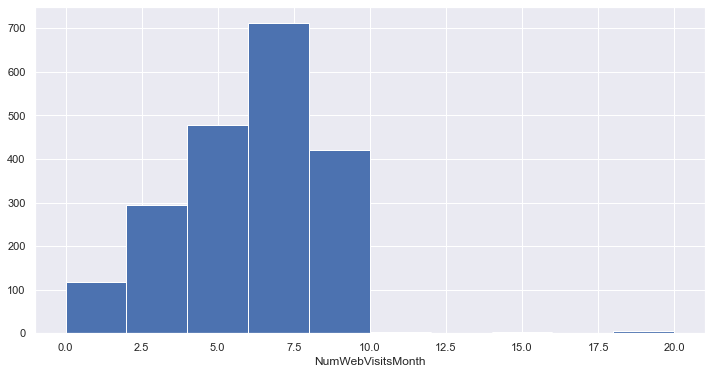

In [92]:
for col in numerical:
    fig = plt.figure(figsize=(12,6))
    plt.hist(df[col])
    plt.xlabel(col)
    plt.show()

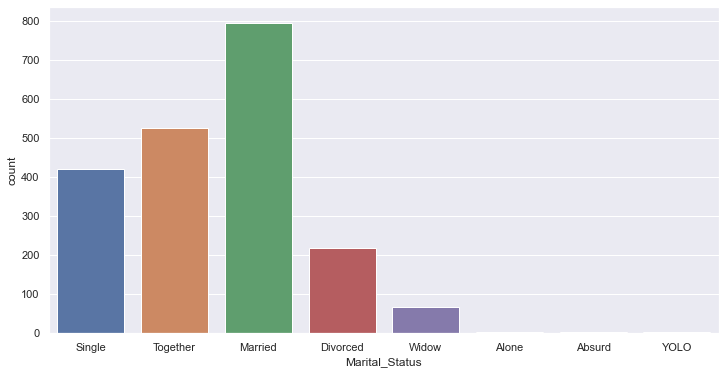

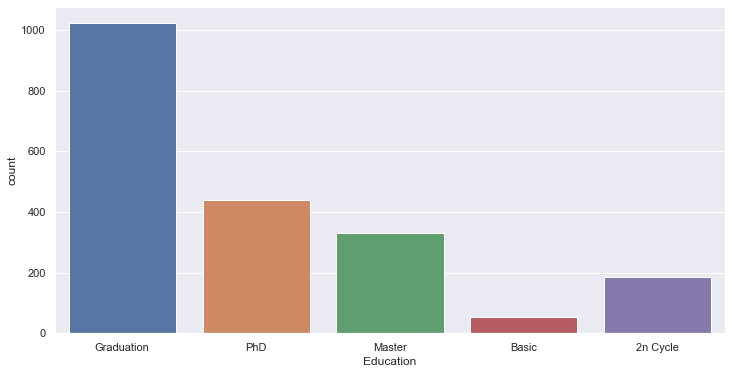

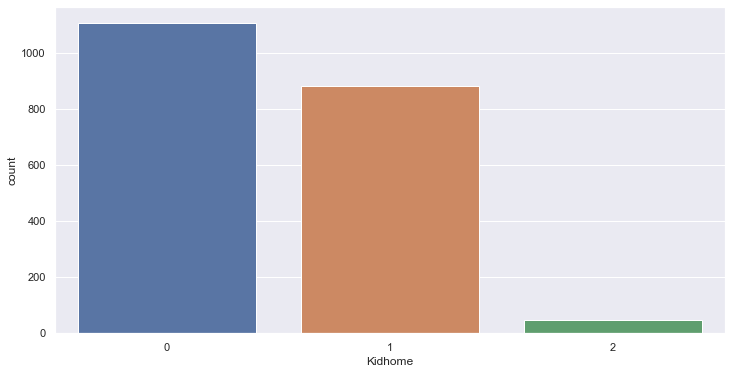

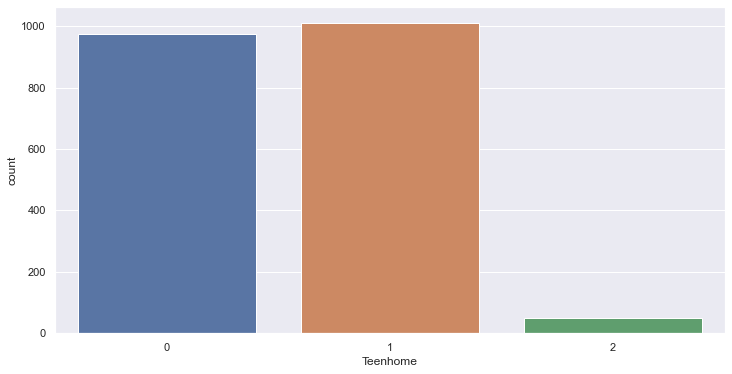

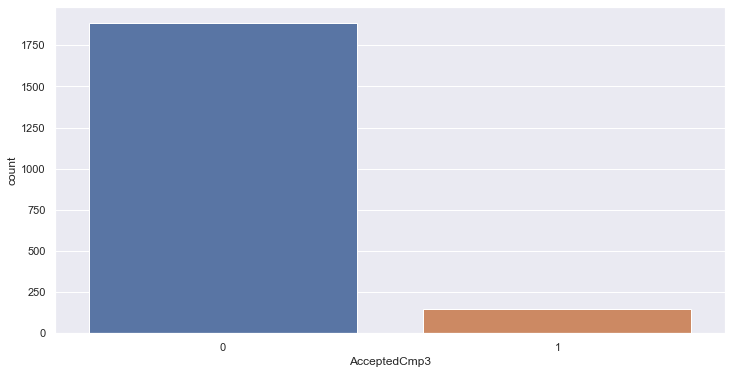

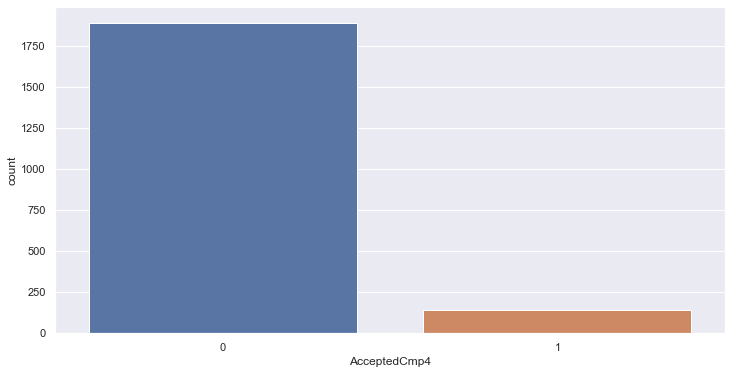

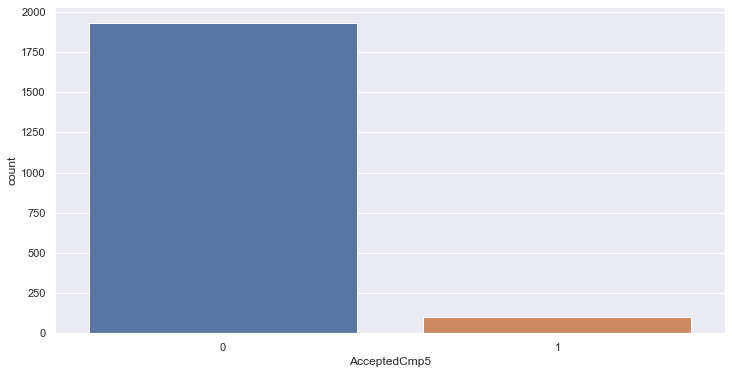

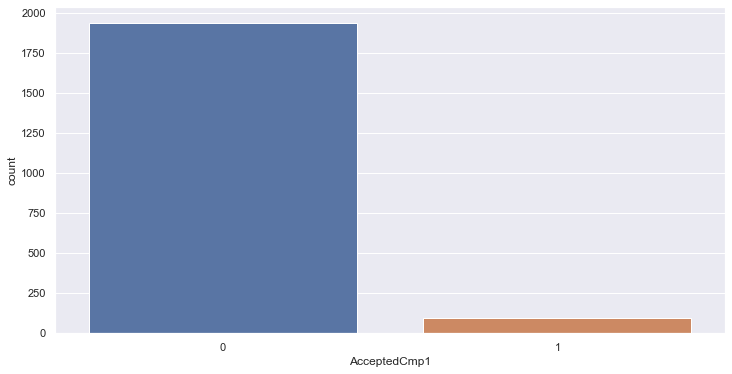

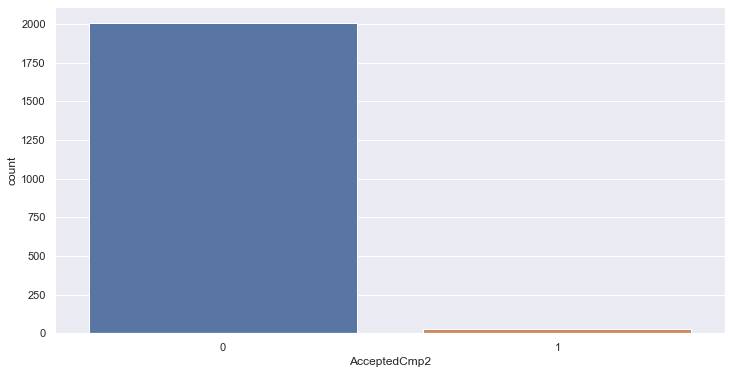

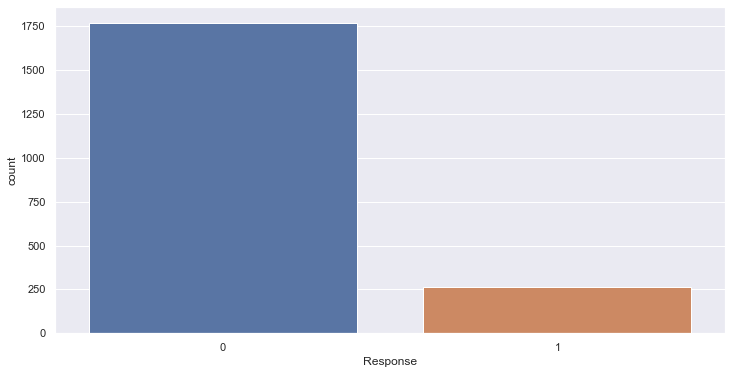

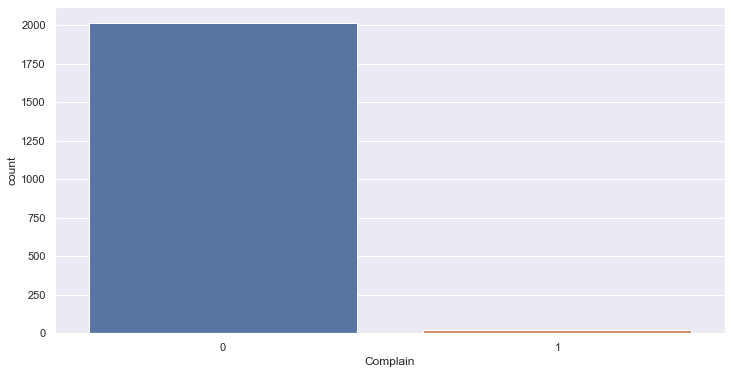

In [93]:
for col in categorical:
    fig = plt.figure(figsize=(12,6))
    sns.countplot(x=df[col])
    plt.xlabel(col)
    plt.show()

## Create new variables and Drop the olds

In [103]:
# CREATE A NEW VARIABLE Student_Degree
df["Student_Degree"] = df["Education"].replace({"Graduation":"Graduate", "PhD":"Post_Grad", "Master":"Post_Grad", "2n Cycle":"Basic"})

# CREATE A NEW VARIABLE Has_Partner
df["Has_Partner"] = df["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Single":"Alone", "Divorced":"Alone", "Absurd":"Alone", "YOLO":"Alone", "Widow":"Alone"})

# CREATE A NEW VARIABLE Has_Children
df.loc[df["Kidhome"] > 0, "Has_Children"] = 1
df.loc[df["Kidhome"] == 0, "Has_Children"] = 0

# CREATE A NEW VARIABLE Has_Teen
df.loc[df["Teenhome"] > 0, "Has_Teen"] = 1
df.loc[df["Teenhome"] == 0, "Has_Teen"] = 0

KeyError: 'Education'

In [95]:
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Student_Degree,Has_Partner,Has_Children,Has_Teen
0,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,...,0,0,0,0,0,1,Graduate,Alone,0.0,0.0
1,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,...,0,0,0,0,0,0,Graduate,Alone,1.0,1.0
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,0,0,0,0,0,0,Graduate,Partner,0.0,0.0
3,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,4,...,0,0,0,0,0,0,Graduate,Partner,1.0,0.0
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,0,0,0,0,0,0,Post_Grad,Partner,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2030,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,...,0,0,0,0,0,0,Graduate,Partner,0.0,1.0
2031,1946,PhD,Together,64014.0,2,1,2014-10-06,56,406,0,...,0,0,1,0,0,0,Post_Grad,Partner,1.0,1.0
2032,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,...,1,0,0,0,0,0,Graduate,Alone,0.0,0.0
2033,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,...,0,0,0,0,0,0,Post_Grad,Partner,0.0,1.0


In [96]:
# DROP OLD COLUMNS
df = df.drop(["Education", "Marital_Status", "Kidhome", "Teenhome"], axis=1)

## Make more plots

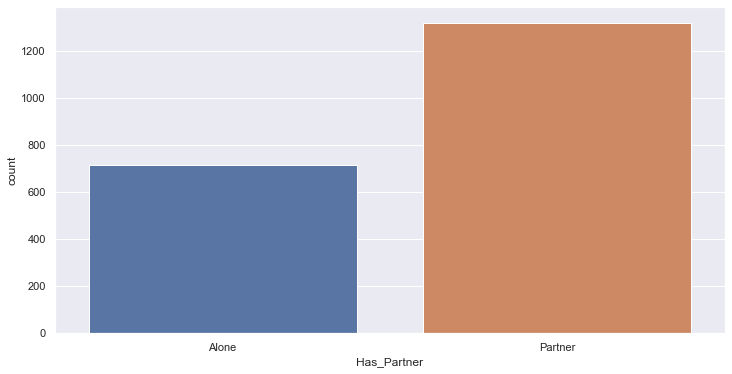

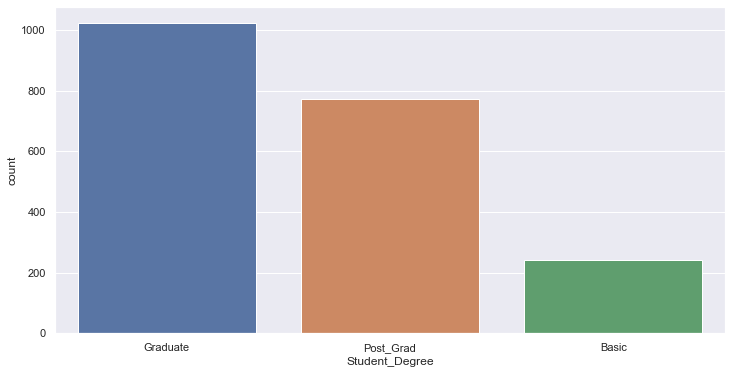

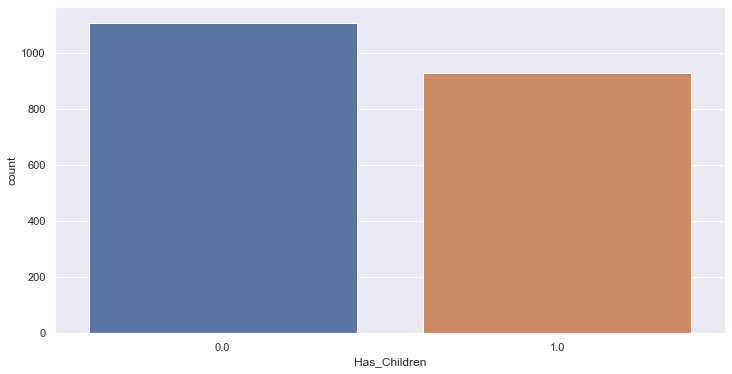

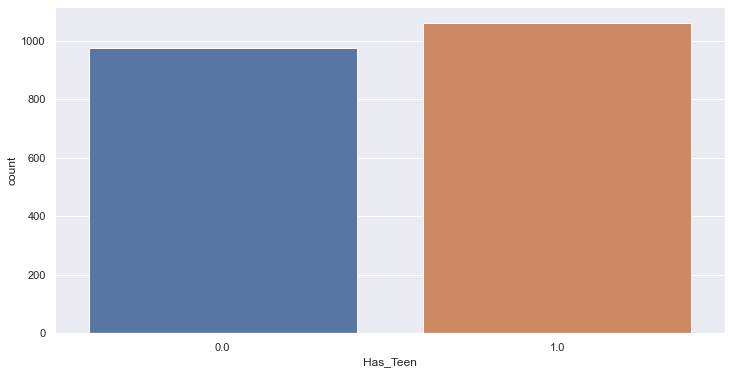

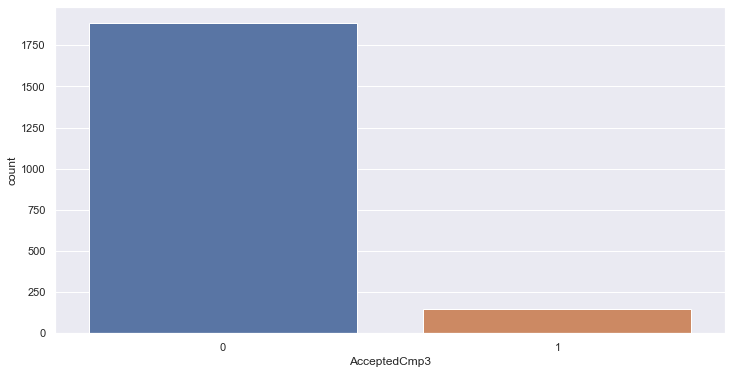

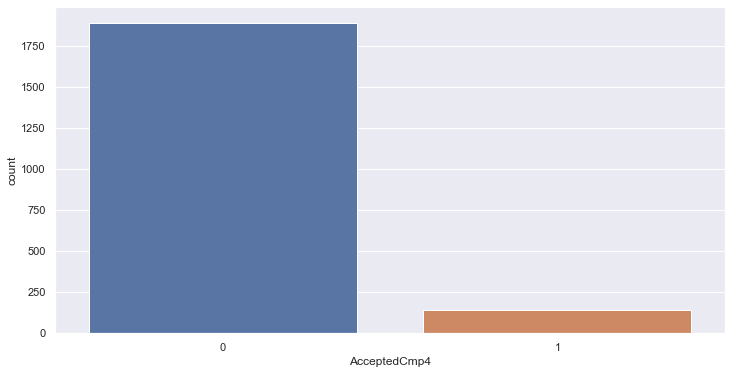

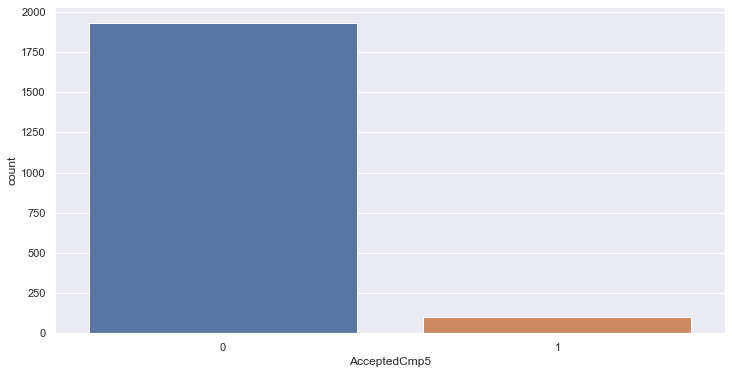

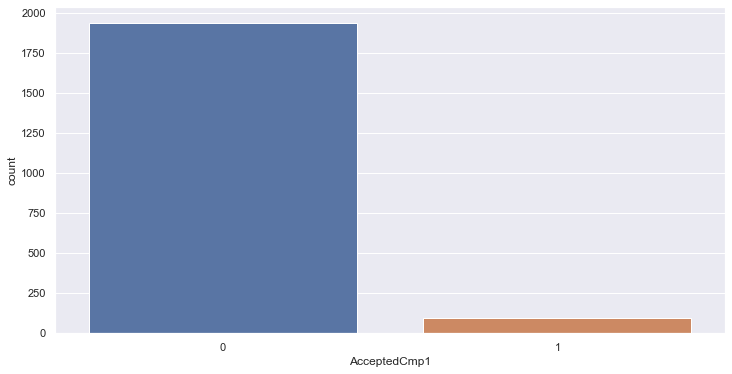

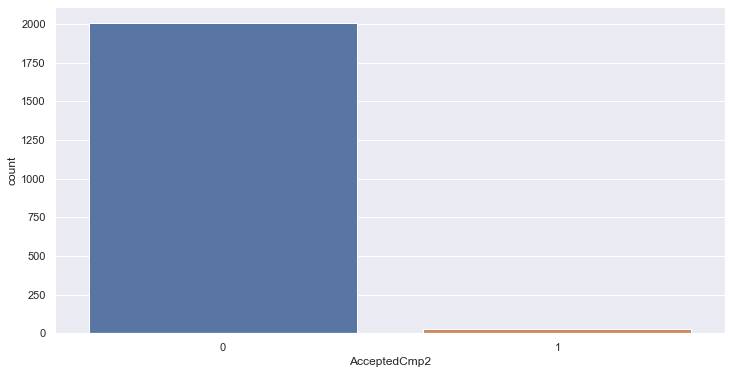

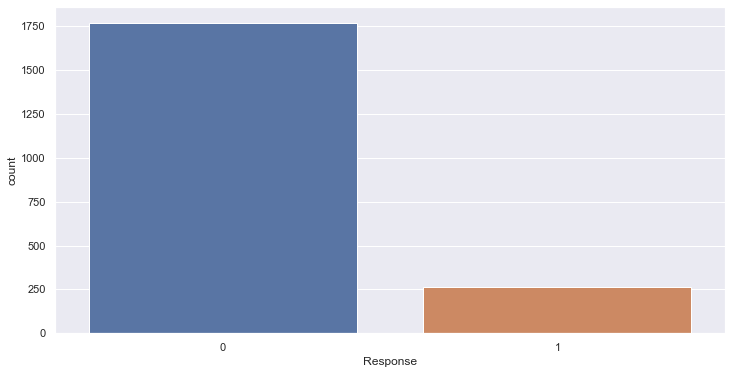

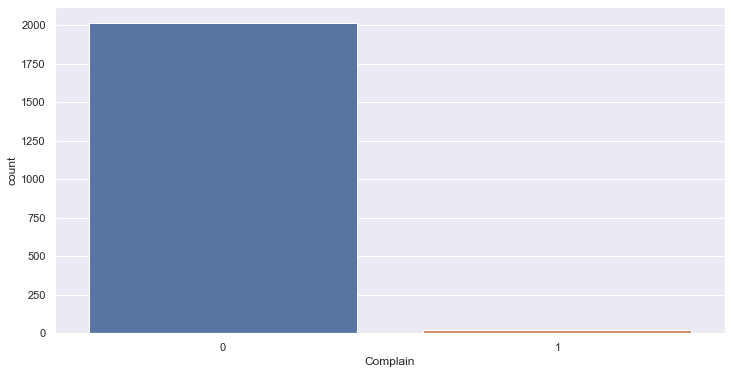

In [97]:
# PLOT SOME GRAPHS TO ANALISE THE COLUMNS
categorical = ["Has_Partner", "Student_Degree", "Has_Children", "Has_Teen", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "AcceptedCmp1", "AcceptedCmp2", "Response", "Complain"]
for col in categorical:
    fig = plt.figure(figsize=(12,6))
    sns.countplot(x=df[col])
    plt.xlabel(col)
    plt.show()

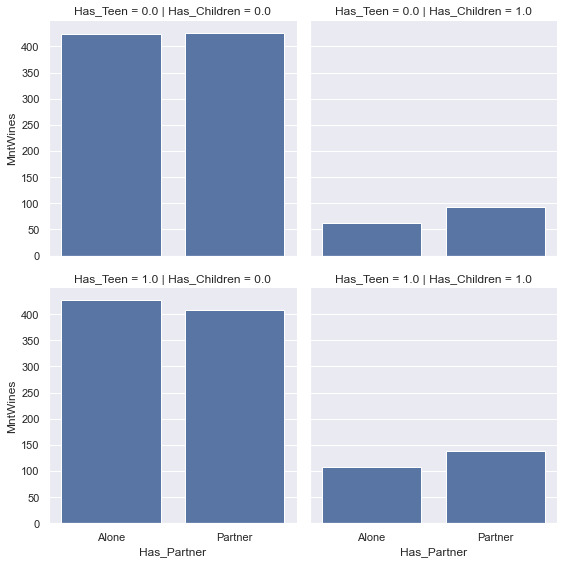

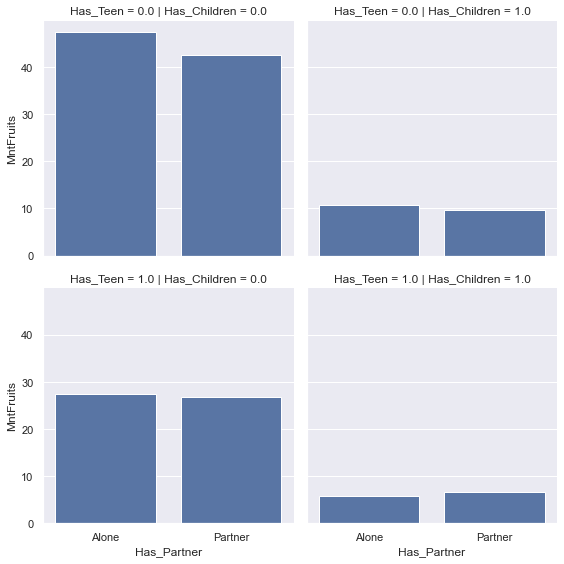

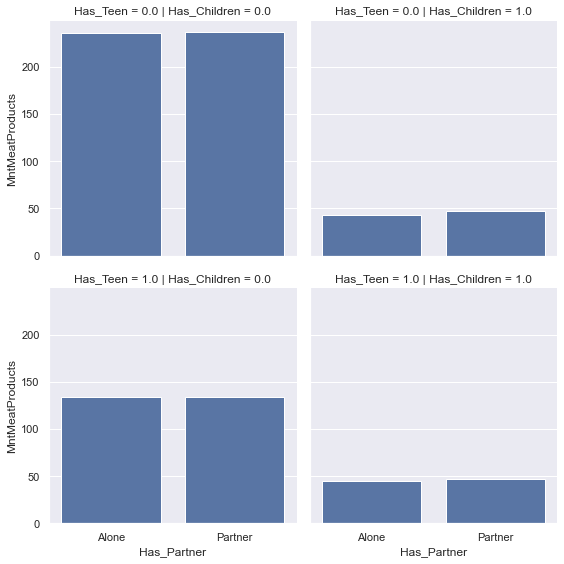

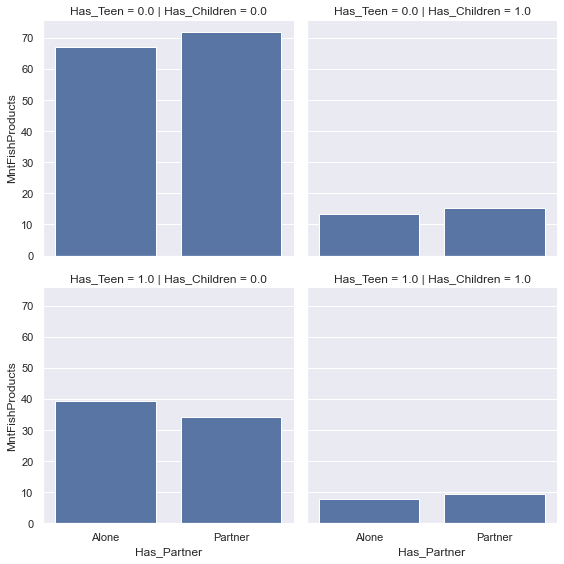

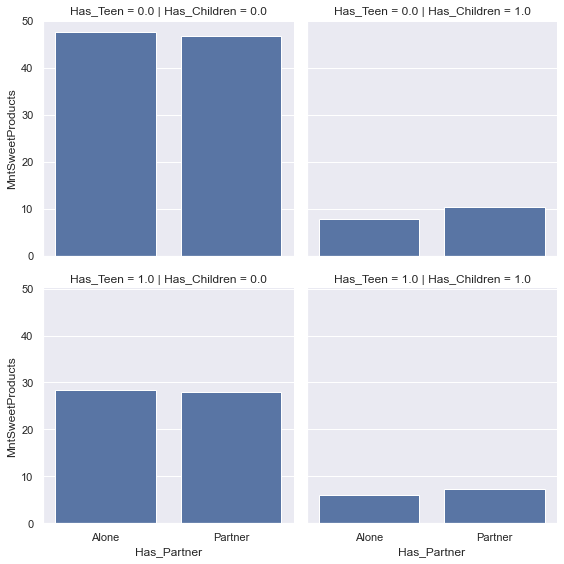

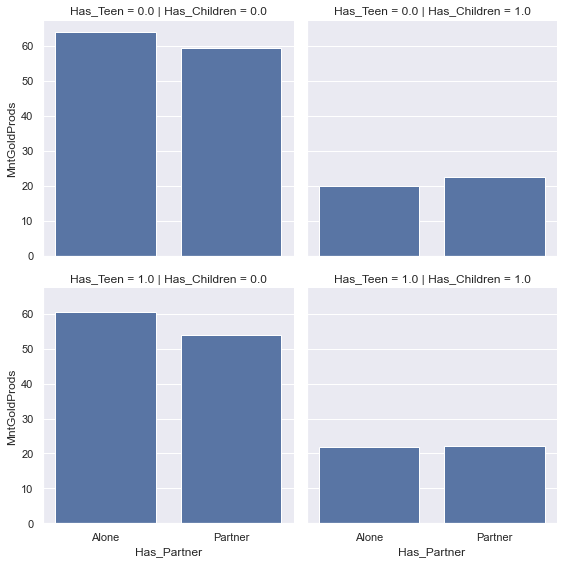

In [98]:
# HERE WE COMPARE THE COLUMNS OF AMOUNT OF PRODUCTS WITH IF Has_Children, Has_Teen NAD Has_Partner
products = ["MntWines", 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']

for i in products:
    grid = sns.FacetGrid(data=df, col="Has_Children", row="Has_Teen", height=4)
    grid.map(sns.barplot, "Has_Partner", i, order=["Alone", "Partner"], ci=None)
    plt.show()

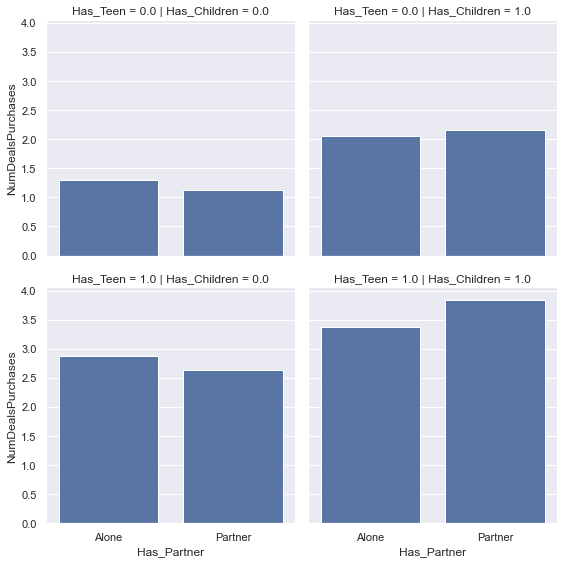

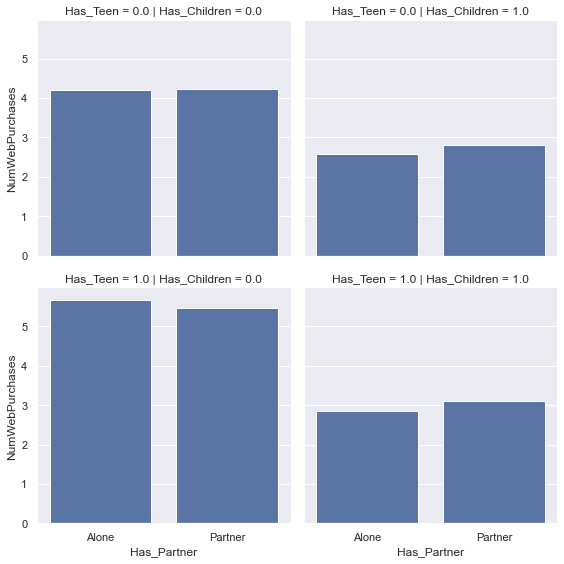

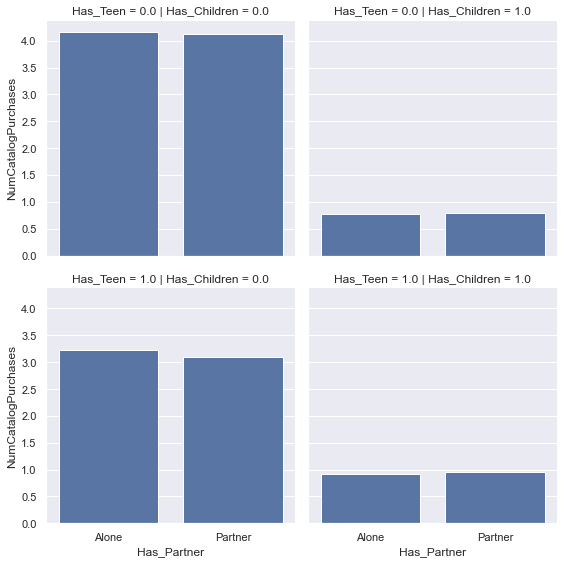

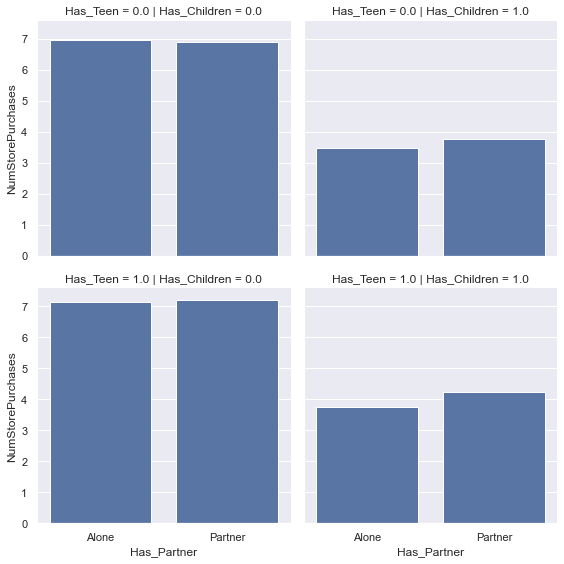

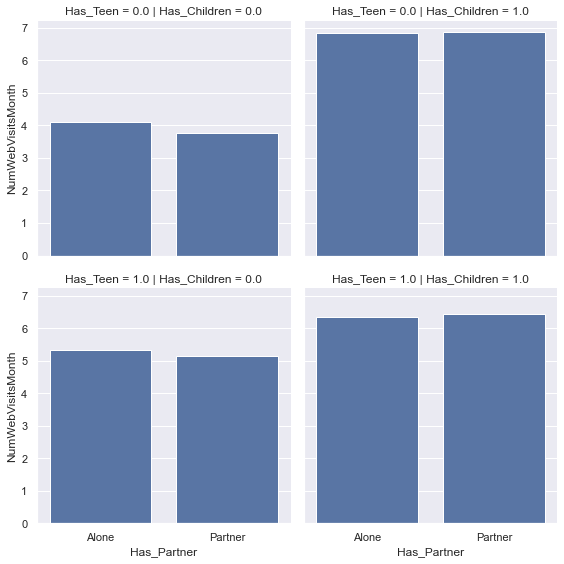

In [99]:
# HERE WE COMPARE THE COLUMNS OF NUMBER OF LOCATIONS PURCHASE WITH IF Has_Children, Has_Teen NAD Has_Partner
products = ['NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

for i in products:
    grid = sns.FacetGrid(data=df, col="Has_Children", row="Has_Teen", height=4)
    grid.map(sns.barplot, "Has_Partner", i, order=["Alone", "Partner"], ci=None)
    plt.show()

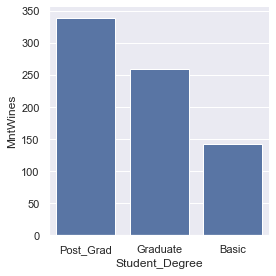

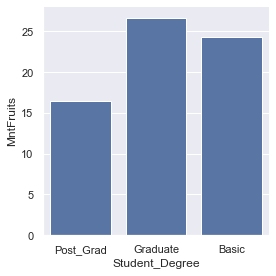

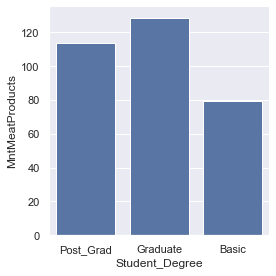

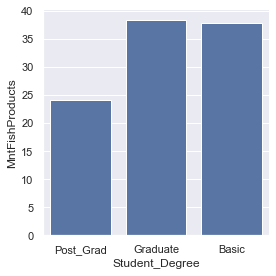

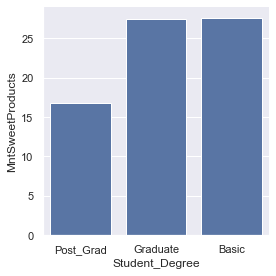

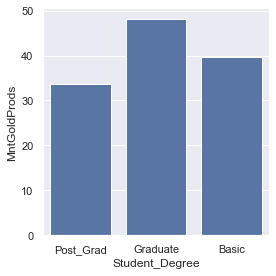

In [100]:
# HERE WE COMPARE THE COLUMNS OF AMOUNT OF PRODUCTS WITH THE STUDY DEGREE
products = ["MntWines", 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']

for i in products:
    grid = sns.FacetGrid(data=df, height=4)
    grid.map(sns.barplot,"Student_Degree", i, order=["Post_Grad", "Graduate", "Basic"], ci=None)
    plt.show()

## Drop More Useless Columns

In [106]:
# DROP MORE USELESS COLUMNS
df = df.drop(["AcceptedCmp4", "AcceptedCmp5", "AcceptedCmp3", "AcceptedCmp2", "AcceptedCmp1", "Complain", "Response"], axis=1)
df = df.drop("Dt_Customer", axis=1)
df_original = df.copy()

KeyError: "['AcceptedCmp4' 'AcceptedCmp5' 'AcceptedCmp3' 'AcceptedCmp2'\n 'AcceptedCmp1' 'Complain' 'Response'] not found in axis"

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Year_Birth           2035 non-null   int64         
 1   Income               2035 non-null   float64       
 2   Dt_Customer          2035 non-null   datetime64[ns]
 3   Recency              2035 non-null   int64         
 4   MntWines             2035 non-null   int64         
 5   MntFruits            2035 non-null   int64         
 6   MntMeatProducts      2035 non-null   int64         
 7   MntFishProducts      2035 non-null   int64         
 8   MntSweetProducts     2035 non-null   int64         
 9   MntGoldProds         2035 non-null   int64         
 10  NumDealsPurchases    2035 non-null   int64         
 11  NumWebPurchases      2035 non-null   int64         
 12  NumCatalogPurchases  2035 non-null   int64         
 13  NumStorePurchases    2035 non-nul

## Transform Data

In [104]:
# TRANSFORM TO INT
df.loc[df["Student_Degree"] == "Basic", "Student_Degree"] = 0
df.loc[df["Student_Degree"] == "Graduate", "Student_Degree"] = 1
df.loc[df["Student_Degree"] == "Post_Grad", "Student_Degree"] = 2

In [105]:
df.loc[df["Has_Partner"] == "Alone", "Has_Partner"] = 0
df.loc[df["Has_Partner"] == "Partner", "Has_Partner"] = 1

## Model

In [109]:
# SCALER THE DATA
from sklearn.preprocessing import StandardScaler

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2035 non-null   int64  
 1   Income               2035 non-null   float64
 2   Recency              2035 non-null   int64  
 3   MntWines             2035 non-null   int64  
 4   MntFruits            2035 non-null   int64  
 5   MntMeatProducts      2035 non-null   int64  
 6   MntFishProducts      2035 non-null   int64  
 7   MntSweetProducts     2035 non-null   int64  
 8   MntGoldProds         2035 non-null   int64  
 9   NumDealsPurchases    2035 non-null   int64  
 10  NumWebPurchases      2035 non-null   int64  
 11  NumCatalogPurchases  2035 non-null   int64  
 12  NumStorePurchases    2035 non-null   int64  
 13  NumWebVisitsMonth    2035 non-null   int64  
 14  Student_Degree       2035 non-null   object 
 15  Has_Partner          2035 non-null   o

In [111]:
std = StandardScaler()
std.fit(df)

StandardScaler()

In [112]:
df_std = pd.DataFrame(std.transform(df), columns=df.columns)

## Reduce the model dimension to visualize the groups 

In [113]:
# https://umap-learn.readthedocs.io/en/latest/
reducer = umap.UMAP()
embedding = reducer.fit_transform(df_std)

In [37]:
embedding.shape

(2213, 2)

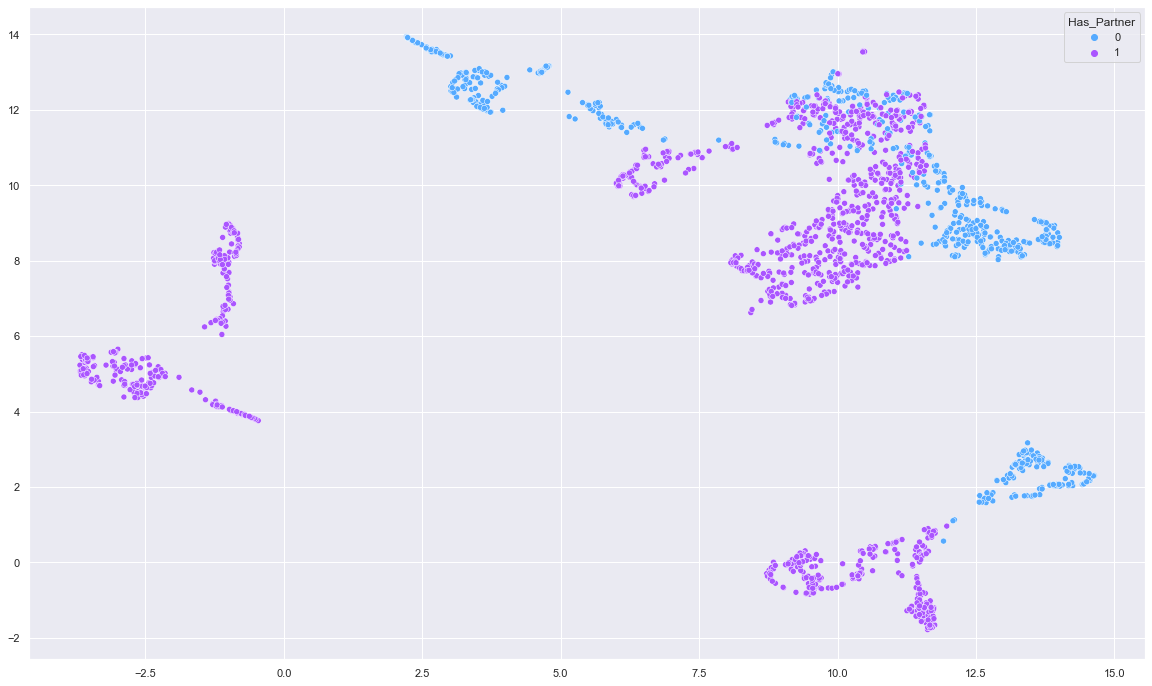

In [114]:
plt.figure(figsize=(20,12))
sns.scatterplot(x=embedding[:,0], y=embedding[:,1], hue=df["Has_Partner"], palette='cool')
plt.show()

In [77]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

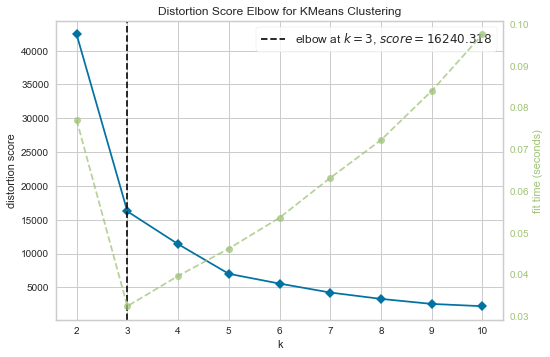

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [78]:
elbow_view = KElbowVisualizer(KMeans(), k=10)
elbow_view.fit(embedding)
elbow_view.show()

In [81]:
elbow_view.elbow_value_

3

In [82]:
kmean = KMeans(n_clusters=3)

In [83]:
kmean.fit(embedding)

KMeans(n_clusters=3)

In [84]:
df["Clusters"] = kmean.predict(embedding)

In [85]:
kmean.labels_

array([1, 2, 1, ..., 1, 1, 2], dtype=int32)

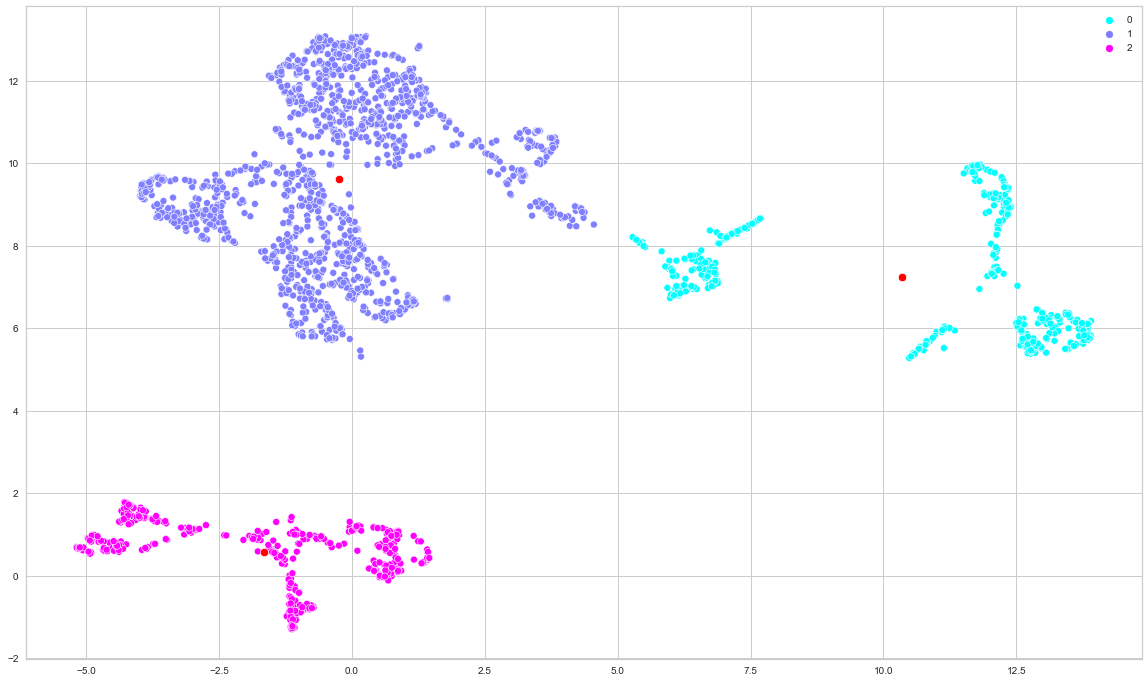

In [86]:
plt.figure(figsize=(20,12))
sns.scatterplot(x=embedding[:,0], y=embedding[:,1], hue=kmean.labels_, palette='cool')
sns.scatterplot(x=kmean.cluster_centers_[:,0], y=kmean.cluster_centers_[:,1], s=70, color="red")
plt.show()

<AxesSubplot:xlabel='Clusters', ylabel='MntWines'>

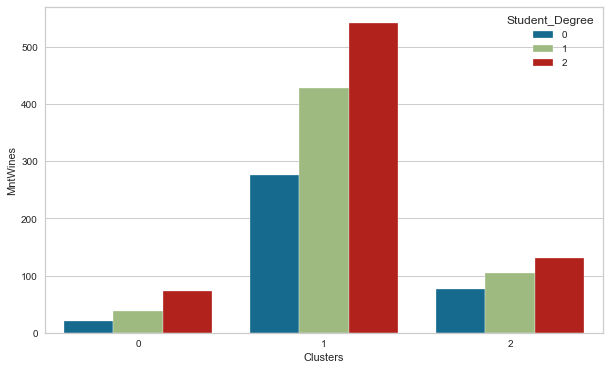

In [92]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x="Clusters", y="MntWines", hue="Student_Degree", ci=0)

<AxesSubplot:xlabel='Has_Partner', ylabel='MntWines'>

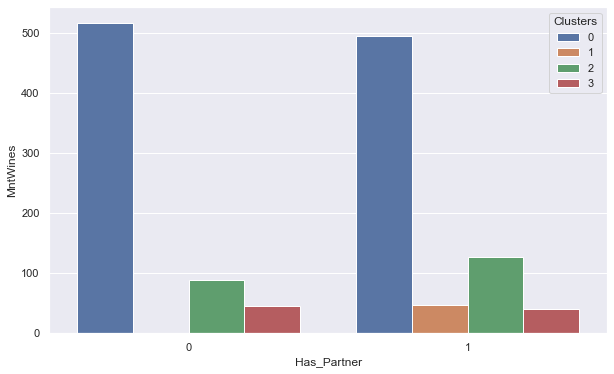

In [71]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x="Has_Partner", y="MntWines", hue="Clusters", ci=0)

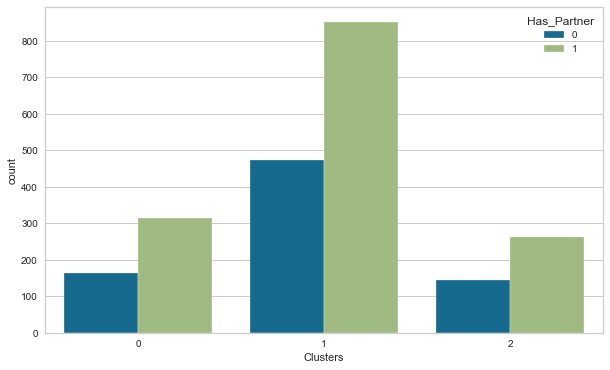

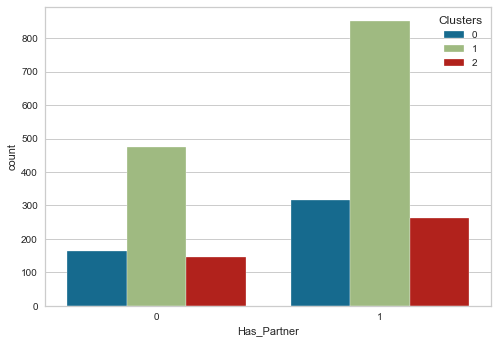

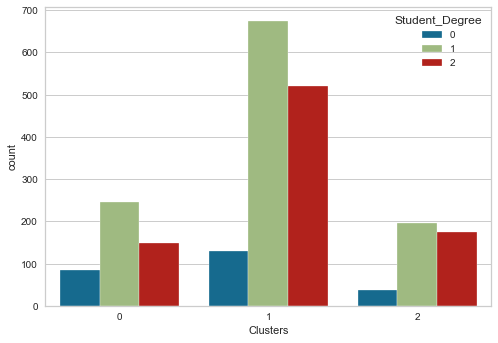

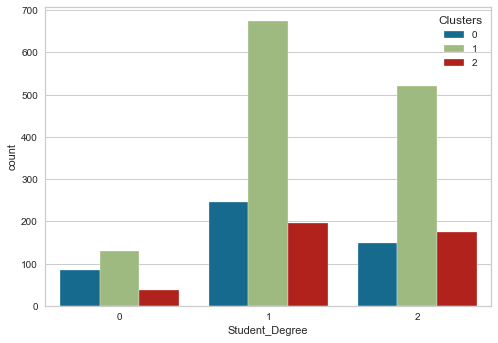

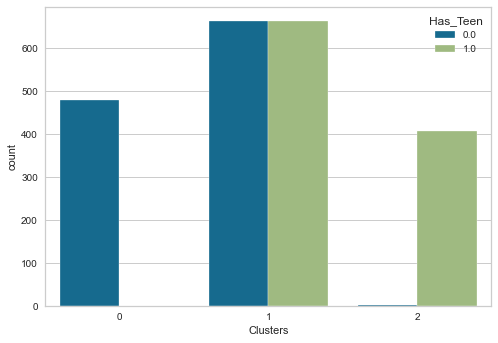

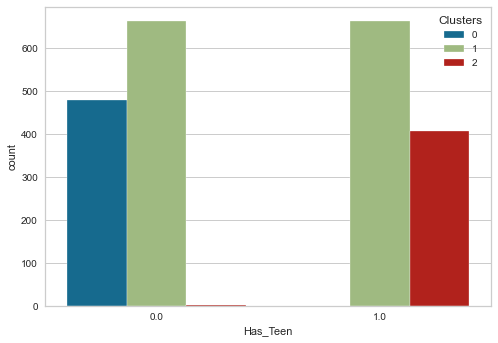

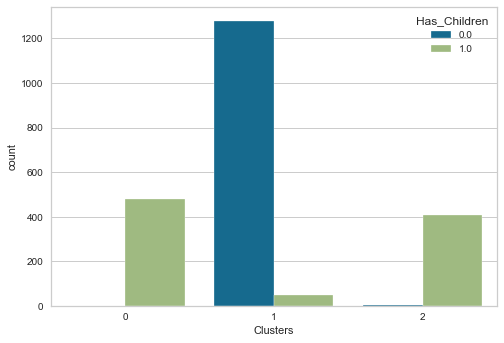

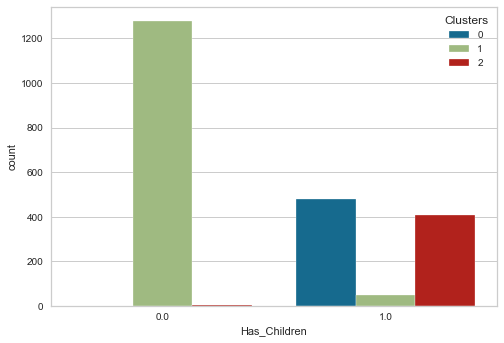

In [106]:
categorical = ["Has_Partner", "Student_Degree", "Has_Teen", "Has_Children"]
for cat in categorical:
    plt.figure(figsize=(10,6))
    sns.countplot(data=df, x="Clusters", hue=cat)
    plt.show()
    sns.countplot(data=df, x=cat, hue="Clusters")
    plt.show()    

<AxesSubplot:xlabel='Has_Children', ylabel='MntFruits'>

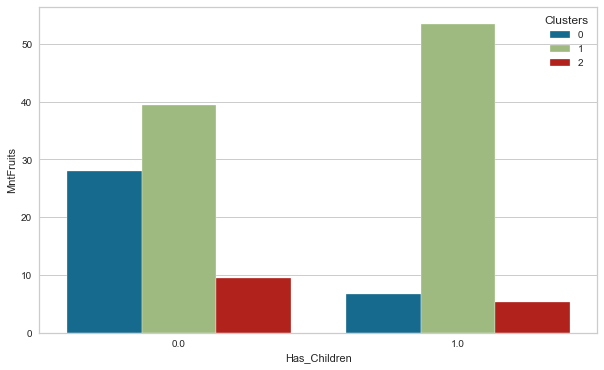

In [105]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x="Has_Children", y="MntFruits", hue="Clusters", ci=0)

In [101]:
df.columns

Index(['Year_Birth', 'Income', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Student_Degree', 'Has_Partner', 'Has_Children', 'Has_Teen',
       'Clusters'],
      dtype='object')